<a href="https://colab.research.google.com/github/eughappy/HomeWork/blob/analyse_data/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('bestsellers with categories.csv')

# **1**

In [ ]:
print(df.head())
print("\nShape:\n", df.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

Shape:
 (550, 7)


**Відповідь: Про 550 книг зберігає дані датасет**



In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [ ]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


**Відповідь: Чи є в якихось змінних пропуски? = Ні**

In [ ]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


**Відповідь: Які є унікальні жанри? 'Non Fiction' 'Fiction'**

<Axes: ylabel='Frequency'>

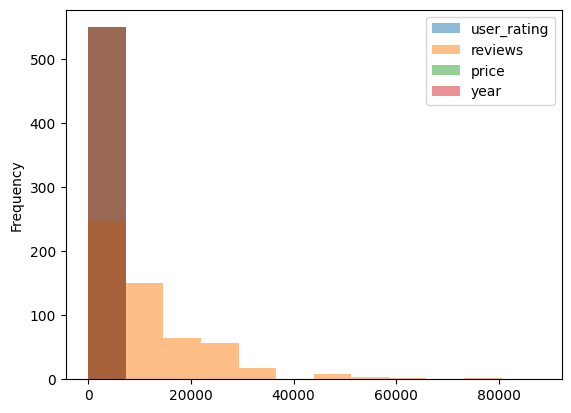

In [ ]:
df.plot(kind = 'hist', bins=12, alpha=0.5)

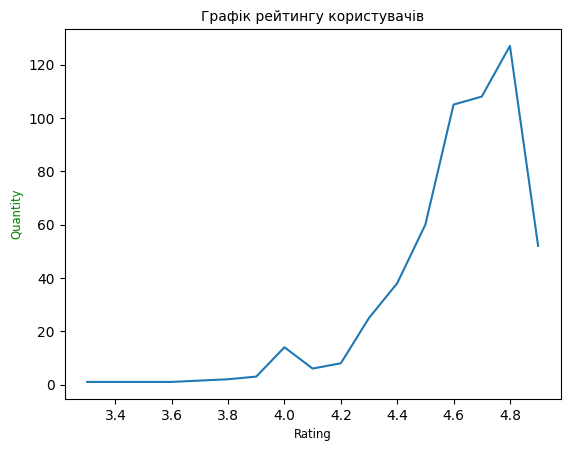

In [ ]:
quant_df = df.groupby('user_rating')['name'].count()
quant_df = quant_df.reset_index()
plt.plot(quant_df['user_rating'],quant_df['name'])
plt.xlabel("Rating", fontsize="small", color="black")
plt.ylabel("Quantity", fontsize="small", color="green")
plt.title("Графік рейтингу користувачів", fontsize=10)
plt.show()

In [ ]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

105
0
13.1
11.0


*   Відповідь: Максимальна ціна? 105
*   Відповідь: Мінімальна ціна? 0
*   Відповідь: Середня ціна? 13.1
*   Відповідь: Медіанна ціна? 11.0

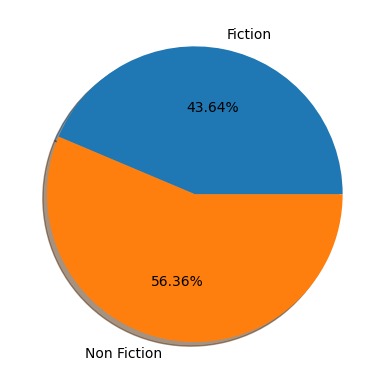

In [ ]:
pie_df = df.groupby('genre')['name'].count()
pie_df = pie_df.reset_index()
pie = plt.pie(pie_df['name'],labels = pie_df['genre'], shadow=True, autopct="%.2f%%")


In [ ]:
print("Найвищий рейтинг ", df['user_rating'].max())
print("Кількість книг ", df['user_rating'].value_counts()[df['user_rating'].max()])
print("Така книга:\n",df[df['reviews'] == df['reviews'].max()])
temp_df = df[df['year'] == 2015]
print("\nНайдорожча:", temp_df[temp_df['price'] == temp_df['price'].max()])
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році:",len(df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]))
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках:", len(df[((df['year']==2010) | (df['year']==2011)) & (df['user_rating'] == 4.9)]))
print(":", df[(df['year']==2015) & (df['price']<8)].sort_values('price'))

Найвищий рейтинг  4.9
Кількість книг  52
Така книга:
                         name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  

Найдорожча:                                                   name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках: 1
:                                                   name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids  



*   Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

*   Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

*   Відповідь: Яка книга має найбільше відгуків? Відповідь: 534  Where the Crawdads Sing

*   Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 277  Publication Manual of the American Psychologic

*   Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

*   Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

*   Відповідь: Яка книга остання у відсортованому списку? Відповідь: 253 Old School (Diary of a Wimpy Kid #10)









In [ ]:
df.groupby('genre')['price'].agg(['min','max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


*  Відповідь: Максимальна ціна для жанру Fiction: 82
*  Відповідь: Мінімальна ціна для жанру Fiction: 0
*  Відповідь: Максимальна ціна для жанру Non Fiction: 105
*  Відповідь: Мінімальна ціна для жанру Non Fiction: 0

In [ ]:
new_df = df.groupby(['author'])['name'].agg('count')
new_df = new_df.reset_index()
new_df = new_df.rename(columns={"name": "count"})
print(new_df.shape)
new_df[new_df['count'] == new_df['count'].max()]

(248, 2)


,author,count
120,Jeff Kinney,12


Text(0.5, 1.0, 'Кількість книг у авторів')

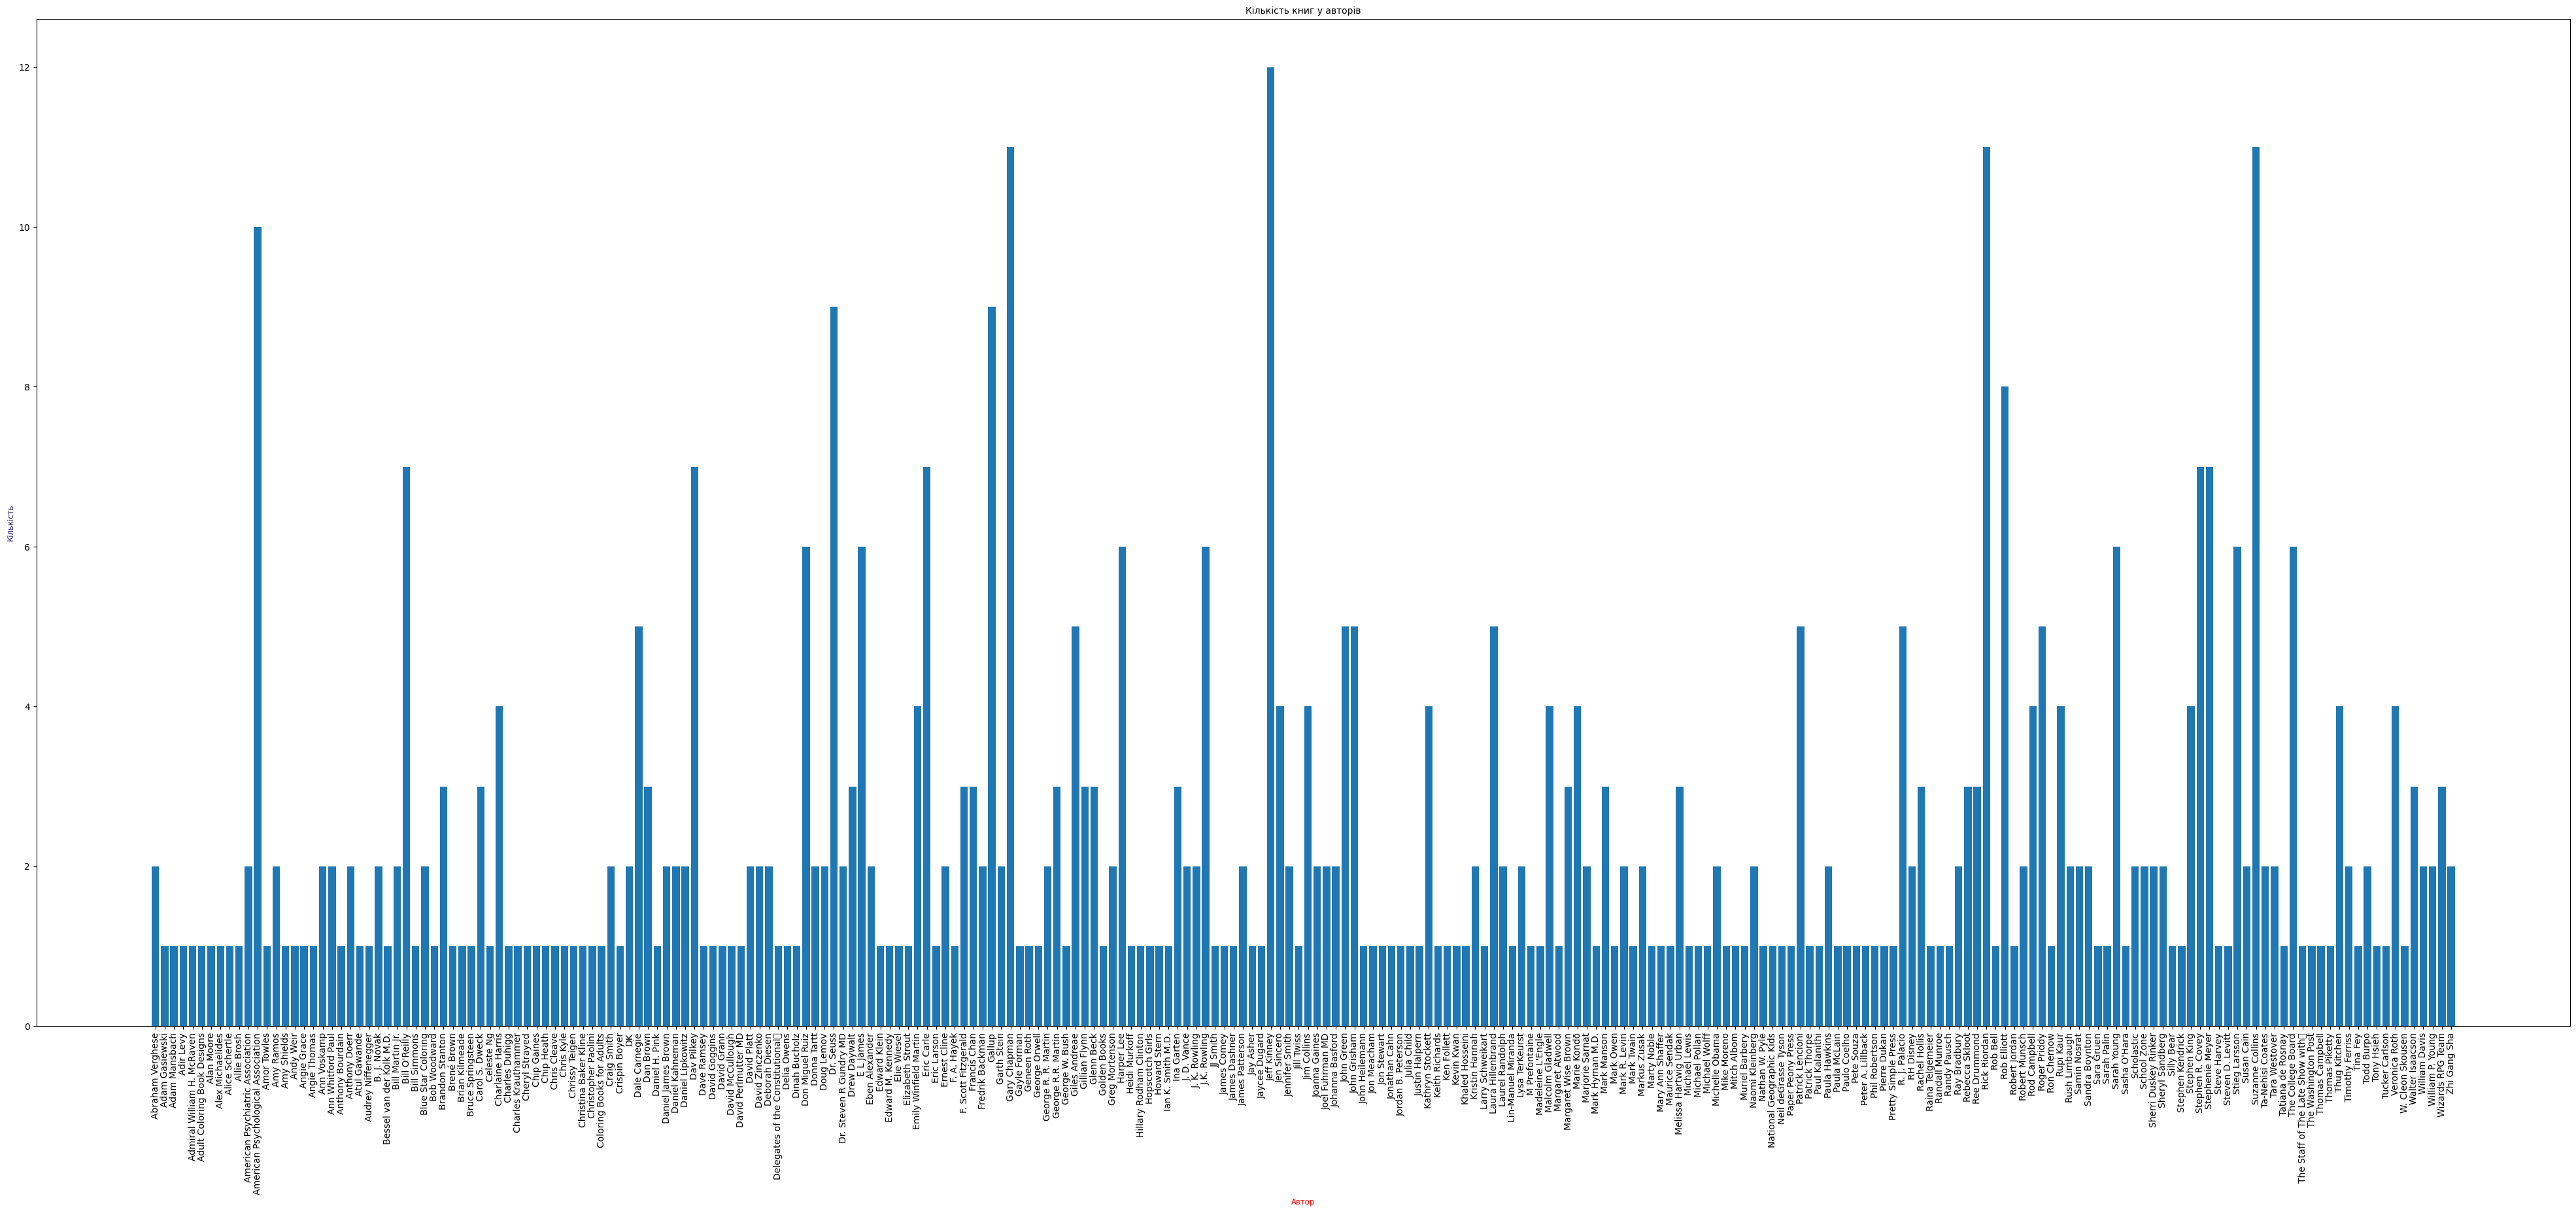

In [ ]:
plt.figure(figsize=(50,20))
plt.xticks(rotation=90,fontsize = 10)
plt.bar(new_df['author'],new_df['count'])
plt.xlabel("Автор", fontsize="small", color="red")
plt.ylabel("Кількість", fontsize="small", color="midnightblue")
plt.title("Кількість книг у авторів", fontsize=10)

#plt.show()

Діаграма рейтингу авторів
*  Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248,2)
*  Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
*  Відповідь: Скільки книг цього автора? Відповідь: 12

In [ ]:
new_rt_df = df.groupby(['author'])['user_rating'].agg('mean')
new_rt_df = new_rt_df.reset_index()
print(new_rt_df[new_rt_df['user_rating'] == new_rt_df['user_rating'].min()])

         author  user_rating
71  Donna Tartt          3.9


*   Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
*   Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9



In [ ]:
#new_rt_df.drop('author',inplace = True, axis = 1)
last_df = pd.concat([new_df, new_rt_df], axis=1)
last_df.sort_values(by=['count', 'user_rating'], ascending = False, inplace=True)
last_df

,author,count,user_rating
120,Jeff Kinney,12,4.800000
197,Rick Riordan,11,4.772727
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
11,American Psychological Association,10,4.500000
...,...,...,...
198,Rob Bell,1,4.200000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000


Відповідь: Який автор перший у списку? 120	Jeff Kinney	12	4.800000